In [1]:
%pip install pandas
import pandas as pd
%pip install numpy
import numpy as np
%pip install scikit-learn
from sklearn.neighbors import KNeighborsClassifier


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
df_titanic_train = pd.read_csv('titanic_training.csv')
df_titanic_test = pd.read_csv('titanic_test.csv')


print(df_titanic_train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [30]:
print(df_titanic_train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [31]:
print(df_titanic_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [32]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Drop unnecessary columns and create X and y
X_train = df_titanic_train.drop(['Survived', 'Cabin', 'Ticket', 'Name'], axis=1)
y_train = df_titanic_train['Survived']

# Map categorical variables
X_train['Sex'] = X_train['Sex'].map({'male': 0, 'female': 1})

# Map Embarked and then drop rows with any remaining missing values
X_train['Embarked'] = X_train['Embarked'].map({'Q': 0, 'S': 1, 'C': 2})
#X_train.dropna(inplace=True)  # Drop rows with any missing values

#Wir extrahieren Titel aus den Namen, z.B. "Mr", "Mrs", "Miss"
#X_train['Title'] = X_train['Name'].str.extract(' ([A-Za-z]+).', expand=False)
#X_train['Title'] = X_train['Title'].map({"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 4, "Rev": 5, "Col": 6, "Major": 7, "Mlle": 8, "Countess": 9, "Ms": 10, "Lady": 11, "Jonkheer": 12, "Don": 13, "Dona": 14, "Mme": 15, "Capt": 16, "Sir": 17})

# Drop the original Name column as it's no longer needed
#X_train.drop('Name', axis=1, inplace=True)
X_train.dropna(inplace=True)  # Drop rows with any missing values

# Ensure that the corresponding rows are removed from y_train
y_train = y_train[X_train.index]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the k-nearest neighbors model
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred = knn.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))


Accuracy: 0.5944055944055944


Embarked and Titel = 0.666  
Embarked = 0.7281  
Titel = 0.6126   
Ohne beide = 0.6957  
Ohne Age = 0.6503 
Cabin = zu viele fehlende Datensätze 


Fragen an Hörchenberger:
Umfang Dokumentation, --> Keine Regelung, Vollständig alles erfassen was gemacht wurde --> Ideen Gedankengänge,
Inhalt Dokumentation,
Fehlende Daten bei Age Cabine ausfüllen oder nicht --> nicht ausfüllen


Dokumentieren dass Datensatz den Gesamtdatensatz besätigt und die Struktur bestätigt,
Grafik machen
Alter erklären, Kabine erklären
erklären dass bei gewissen punkten daten fehlen --> Alter Kritisch für ML Modell

IDEE kleine Abfrage von Daten zum ermitteln ob überlebt oder nicht



In [33]:
#Hyperparameter Tuning
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Define the kNN model
knn = KNeighborsClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27],   # Number of neighbors to use
    'weights': ['uniform', 'distance'], # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)
# Use the best estimator from the grid search
best_knn = grid_search.best_estimator_

# Make predictions on the validation set
y_pred = best_knn.predict(X_val)

# Calculate and print the accuracy on the validation set
accuracy = accuracy_score(y_val, y_pred)
print("Validation Set Accuracy:", accuracy)


Fitting 5 folds for each of 78 candidates, totalling 390 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.6714019562179786
Validation Set Accuracy: 0.6503496503496503


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Validierungssatz erstellen
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# k-nearest Neighbour Modell trainieren
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train, y_train)

# Vorhersagen und Genauigkeit
y_pred = knn.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.7280701754385965


In [35]:
best_n = 1
best_accuracy = 0

for n in range(1, 25):  
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n = n

print(f"Beste Genauigkeit: {best_accuracy:.4f} mit n_neighbors = {best_n}")

Beste Genauigkeit: 0.7281 mit n_neighbors = 23


Weitere Methoden:
    -Random Decision Forest (Rauschtolleranz, Gewichtung von Spalten / fehlende Werte)
    -Support Vector Machine (gut bei hochdimensionalen Datensätzen)
    -Neuronales Netzwerk zum zeigen nicht mit Kanonen auf Spatzen schießen

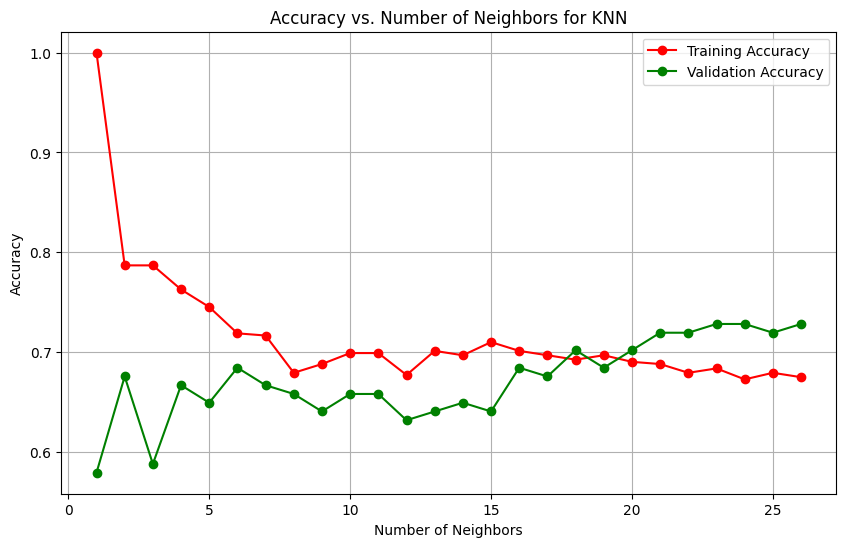

In [36]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the range of neighbors to test
neighbors_range = range(1, 27)
train_scores = []
valid_scores = []

# Train and validate for each number of neighbors
for n_neighbors in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_val_pred = knn.predict(X_val)
    train_scores.append(accuracy_score(y_train, y_train_pred))
    valid_scores.append(accuracy_score(y_val, y_val_pred))

# Plot accuracy vs. number of neighbors
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, train_scores, 'o-', color='r', label='Training Accuracy')
plt.plot(neighbors_range, valid_scores, 'o-', color='g', label='Validation Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors for KNN')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

# 1. CSV-Datei einlesen
csv_data = pd.read_csv('titanic_test.csv')  # Ersetze 'input_data.csv' durch den tatsächlichen Dateinamen

# Features vorbereiten
X_new = csv_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']]

# Sicherstellen, dass die gleichen Vorverarbeitungen wie beim Training angewendet werden
# Beispielsweise: Encoding von 'Sex' und 'Embarked'
X_new['Sex'] = X_new['Sex'].map({'male': 0, 'female': 1})
X_new['Embarked'] = X_new['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Fehlende Werte im Datensatz handhaben, z.B. durch Auffüllen mit Median
X_new['Age'].fillna(X_new['Age'].median(), inplace=True)
X_new['Fare'].fillna(X_new['Fare'].median(), inplace=True)

# 2. Modell anwenden
predictions = model.predict(X_new)

# Ergebnisse speichern
csv_data['Prediction'] = predictions
csv_data.to_csv('Ergebnisse.csv', index=False)

# 3. Ergebnisse mit der Excel-Datei überprüfen
excel_data = pd.read_csv('titanic_test_survival.csv')  # Excel-Datei einlesen

# Annahme: Die tatsächlichen Werte sind in einer Spalte namens 'Survived' gespeichert
csv_data['Correct'] = csv_data['Prediction'] == excel_data['Survived']

# 'Ja' oder 'Nein' einfügen
csv_data['Correct'] = csv_data['Correct'].apply(lambda x: 'Ja' if x else 'Nein')

# Aktualisierte Datei speichern
csv_data.to_csv('Ergebnisse_mit_Verifizierung.csv', index=False)
